   # 1. 구현자 정보

   충남대학교 컴퓨터공학과 201602011 서성덕


   # 2. 구현하고자 하는 주제와 그 문제를 어디에 적용할 것인지 설명

   CNN을 이용하여 다중분류 프로그램을 구현합니다.

   행성 이미지 데이터를 학습하여 지구/화성/토성/달을 구분합니다.
   

   # 3. 문제 및 데이터 셋 소개

   행성 이미지 데이터를 받았을 때 카테고리에 맞도록 분류하는 문제입니다.

   이번 프로젝트에서는 지구/화성/토성/달을 카테고리로 나누어 구분합니다.

   데이터셋은 구글 이미지 검색을 통해 필자가 직접 수집하였습니다.


   - [데이터셋 구성]

   Earth: 686 images

   Mars: 904 images

   Saturn: 685 images

   Moon: 768 images


   # 4. 참조 문서

   링크: https://tykimos.github.io/

In [1]:
!pip uninstall numpy
!pip install --upgrade numpy==1.16.1

Uninstalling numpy-1.16.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.6
    /usr/local/lib/python3.6/dist-packages/numpy-1.16.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.16.1
  Using cached https://files.pythonhosted.org/packages/f5/bf/4981bcbee43934f0adb8f764a1e70ab0ee5a448f6505bd04a87a2fda2a8b/numpy-1.16.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: umap-learn 0.4.4 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [1]:
import numpy as np
np.__version__

'1.16.1'

In [2]:
from google.colab import drive
drive.mount('/gdrive',force_remount = True)

Mounted at /gdrive


In [3]:
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

groups_folder_path = '/gdrive/My Drive/planet_project/data/'
# 4개의 다중분류를 할 것이며, 카테고리를 나누어줍니다.
categories = ['Earth', 'Moon', 'Mars', 'Saturn']

# 카테고리의 개수를 저장합니다.
num_classes = len(categories)

# 데이터 용량 줄이기 위한 코드입니다.
# 28 * 28로 변환합니다.
image_w = 28
image_h = 28

X = []
Y = []

for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path + categorie + '/'

    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir + filename)
            img = cv2.imread(image_dir + filename)
            # cv2 resize를 통해 resize합니다.
            img = cv2.resize(img, None, fx=image_w / img.shape[1], fy=image_h / img.shape[0])
            # 255로 되어있는 것을 0~1로 나누어 Scaling합니다.
            X.append(img / 256)
            Y.append(label)

X = np.array(X)
Y = np.array(Y)

/gdrive/My Drive/planet_project/data/Earth/earth (6).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (212).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (204).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (202).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (203).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (685).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (103).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (104).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (102).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (105).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (106).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (686).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (684).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (1).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (205).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (107).jpg
/gdrive/My Drive/planet_project/data/Earth/earth (108).jpg
/

In [0]:
# train과 test를 나누어줍니다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
xy = (X_train, X_test, Y_train, Y_test)

# 1개의 배열을 NumPy format 의 바이너리 파일로 저장합니다.
np.save("./img_data.npy", xy)

In [5]:
X_train, X_test, Y_train, Y_test = np.load('./img_data.npy')

import os, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend.tensorflow_backend as K

with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'

    if not os.path.exists(model_dir):
        os.mkdir(model_dir)

    model_path = model_dir + '/planet_model.model'
    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [6]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test), callbacks=[checkpoint, early_stopping])

Train on 2282 samples, validate on 761 samples
Epoch 1/50
2282/2282 [==============================] - 7s 3ms/step - loss: 0.8106 - accuracy: 0.6569 - val_loss: 0.6458 - val_accuracy: 0.7503

Epoch 00001: val_loss improved from inf to 0.64578, saving model to ./model/planet_model.model
Epoch 2/50
2282/2282 [==============================] - 1s 228us/step - loss: 0.5491 - accuracy: 0.7971 - val_loss: 0.6084 - val_accuracy: 0.7293

Epoch 00002: val_loss improved from 0.64578 to 0.60838, saving model to ./model/planet_model.model
Epoch 3/50
2282/2282 [==============================] - 1s 225us/step - loss: 0.4666 - accuracy: 0.8313 - val_loss: 0.4304 - val_accuracy: 0.8305

Epoch 00003: val_loss improved from 0.60838 to 0.43043, saving model to ./model/planet_model.model
Epoch 4/50
2282/2282 [==============================] - 1s 241us/step - loss: 0.3866 - accuracy: 0.8554 - val_loss: 0.4439 - val_accuracy: 0.8515

Epoch 00004: val_loss did not improve from 0.43043
Epoch 5/50
2282/2282 [=

In [7]:
print("정확도 : %.4f" % (model.evaluate(X_test, Y_test)[1]))

761/761 [==============================] - 0s 129us/step
정확도 : 0.9133


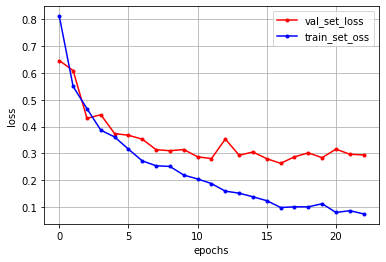

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [9]:
import os
import cv2
import numpy as np
from keras.models import load_model

categories = ['Earth', 'Moon', 'Mars', 'Saturn']

def Dataization(img_path):
    image_w = 28
    image_h = 28
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=image_w / img.shape[1], fy=image_h / img.shape[0])
    return (img / 256)


src = []
name = []
test = []
image_dir = "/gdrive/My Drive/planet_project/test_data/"
for file in os.listdir(image_dir):
    if (file.find('.jpg') is not -1):
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization(image_dir + file))

test = np.array(test)
model = load_model('./model/planet_model.model')
predict = model.predict_classes(test)

for i in range(len(test)):
    print(name[i] + " : , Predict : " + str(categories[predict[i]]))

moon_test.jpg : , Predict : Moon
earth_test.jpg : , Predict : Earth
mars_test.jpg : , Predict : Mars
saturn_test.jpg : , Predict : Saturn
